In [33]:
from baynes.model_utils import *
from baynes.plotter import FitPlotter
from cmdstanpy import CmdStanModel
from baynes.analysis import standard_analysis
import matplotlib.pyplot as plt
import cmdstanpy
import logging
cmdstanpy.utils.get_logger().setLevel(logging.ERROR)
plt.style.use('ggplot')

In [45]:
stan_file= get_stan_file("lorentzians_asymm.stan")
model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

Found .stan file  /home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians_asymm.stan


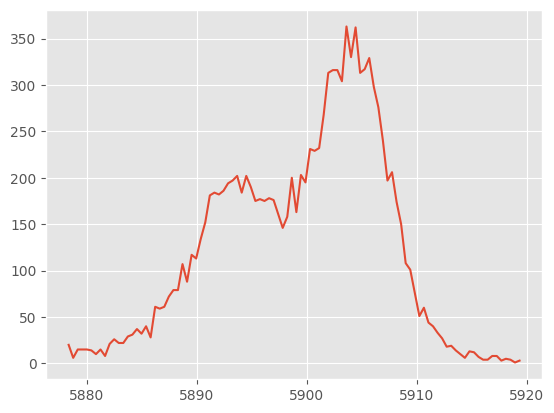

In [53]:
datContent = [i.strip().split() for i in open("Fe_cal_7.dat").readlines()]
data = [float(d) for d in datContent[0]]
counts, edges = np.histogram(data, 100)
centers = np.array([(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)])
plt.plot(centers, counts)


 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



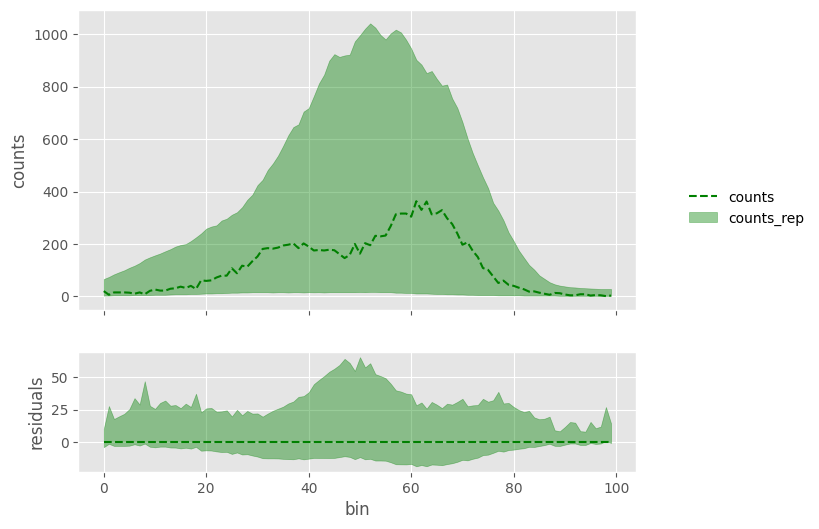


 ---- Prior distribustions ---- 



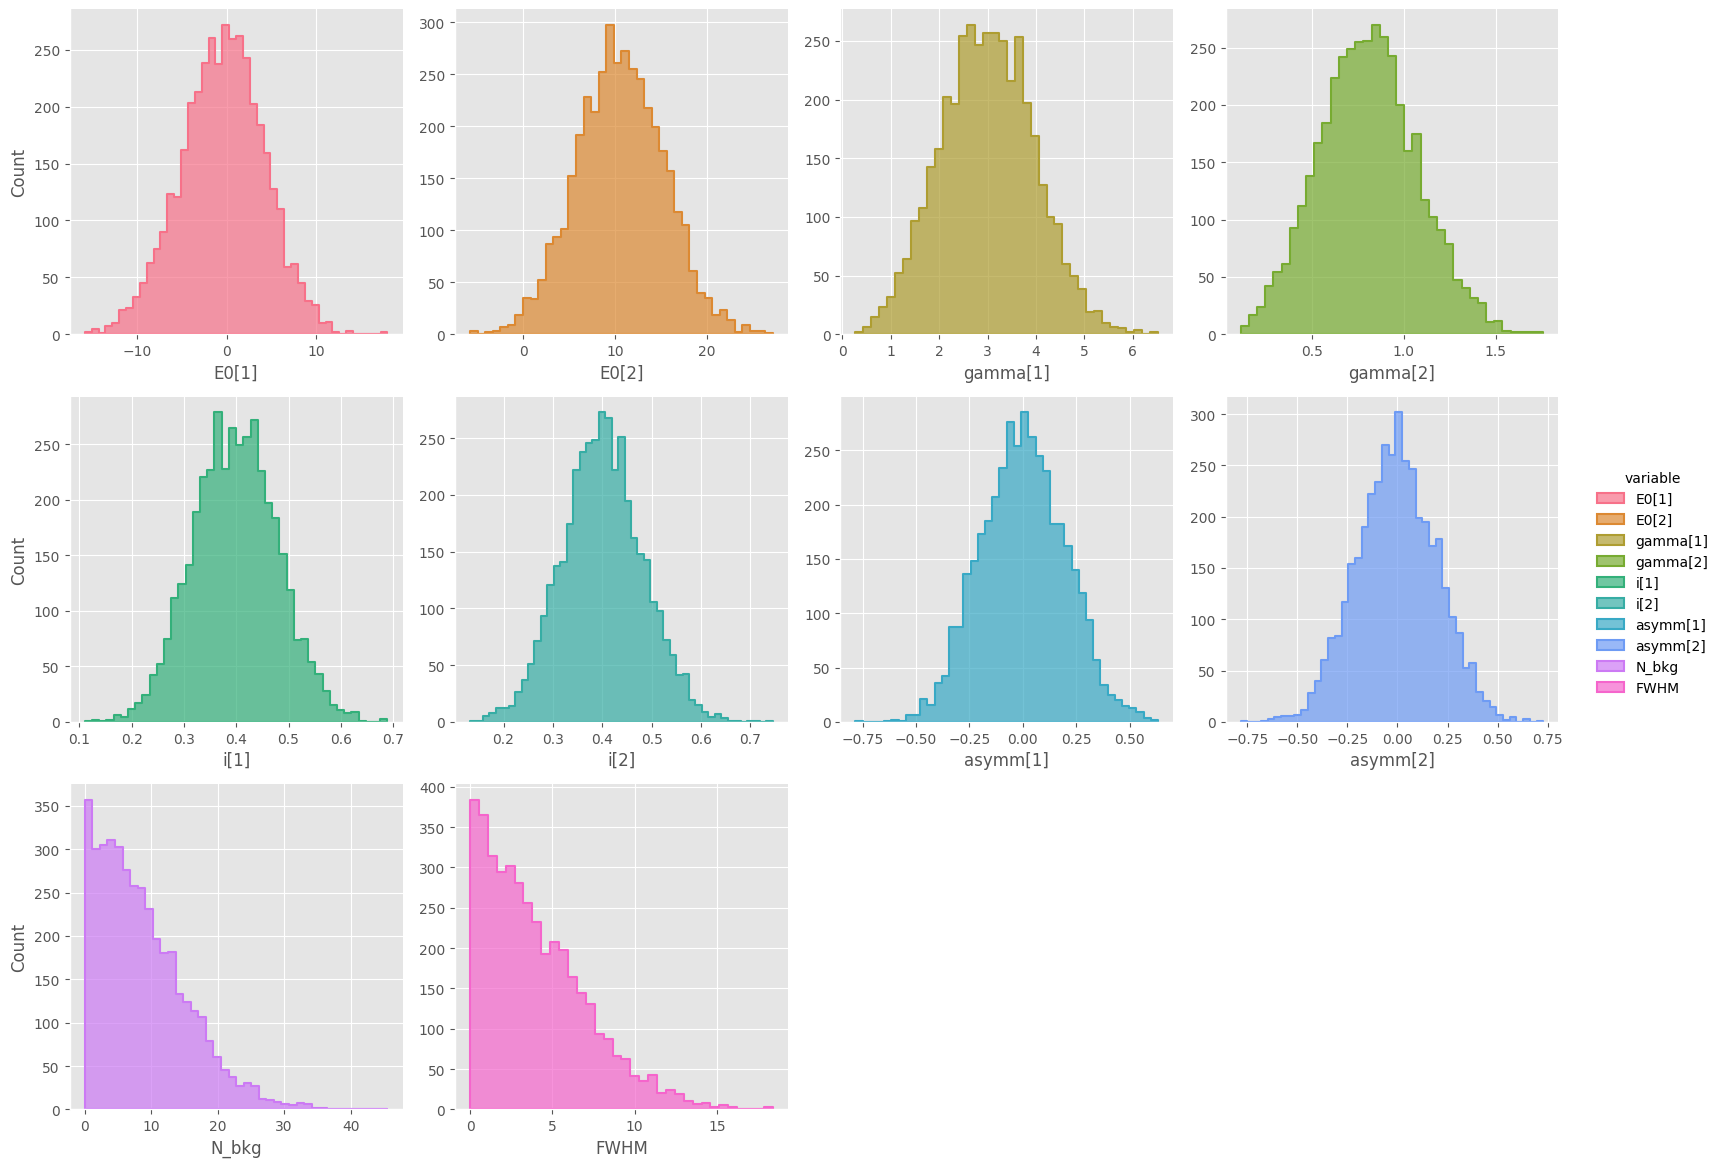


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Processing csv files: /tmp/tmpl4oy8dtl/lorentzians_asymmvhke83c1/lorentzians_asymm-20230726223201_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpl4oy8dtl/lorentzians_asymmvhke83c1/lorentzians_asymm-20230726223201_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpl4oy8dtl/lorentzians_asymmvhke83c1/lorentzians_asymm-202307262232

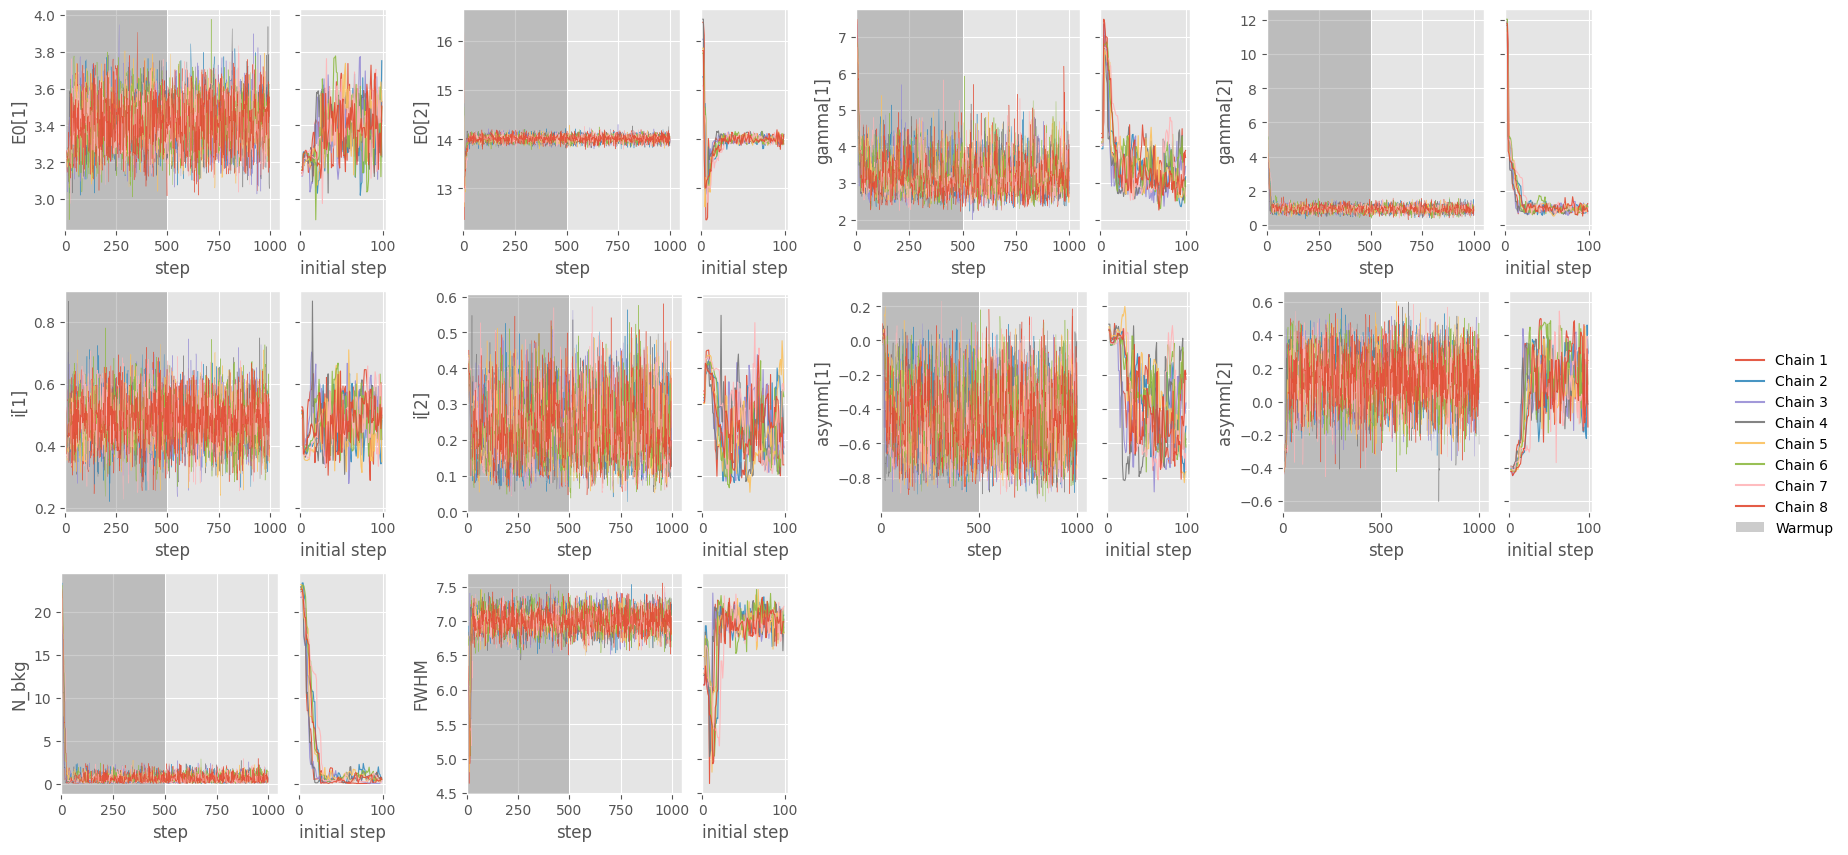


 ---- Prior predictive check ---- 



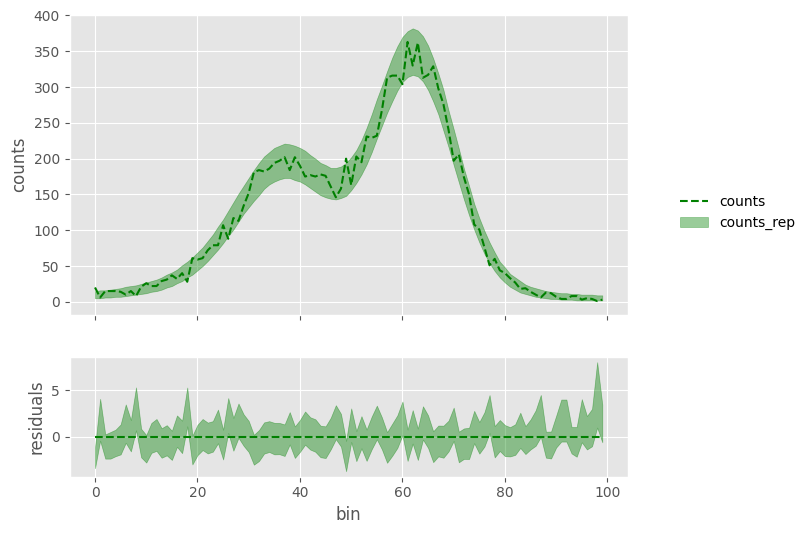


 ---- Posterior distribustions ---- 



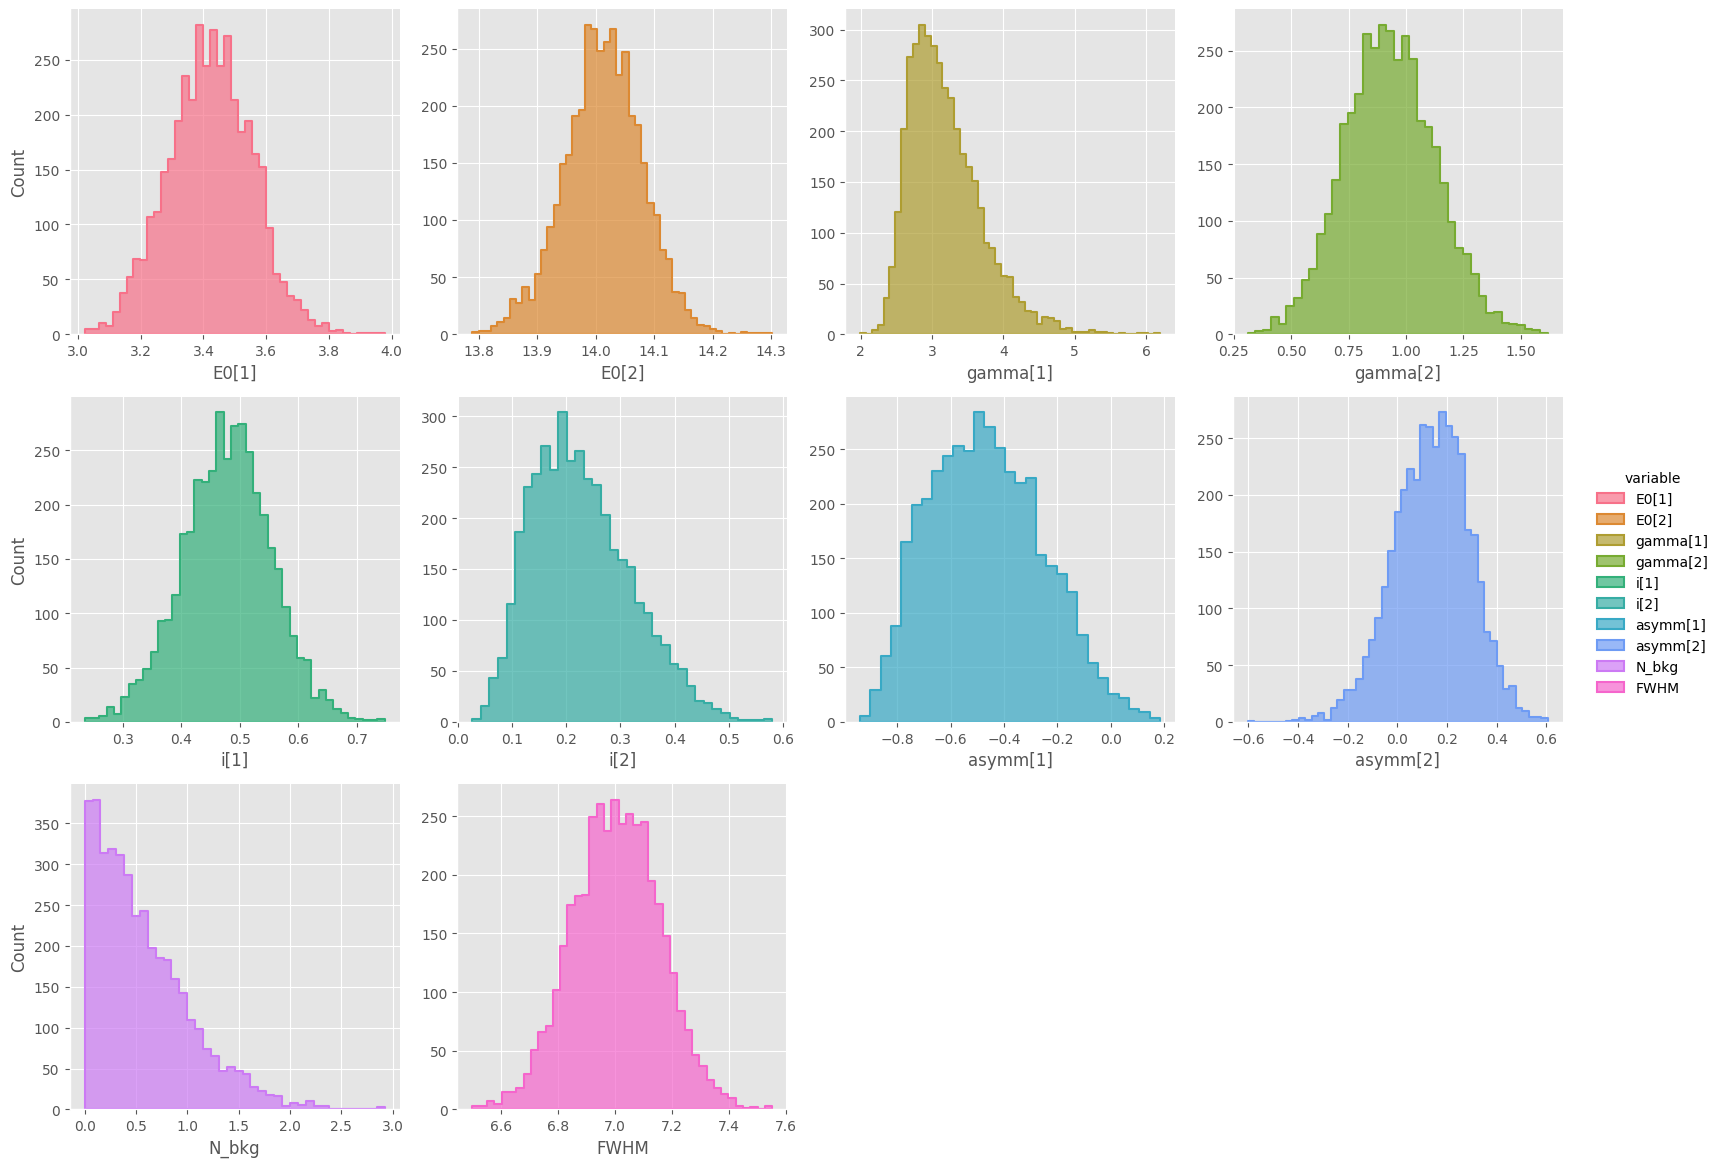


 ---- Prior vs posterior comparison ---- 



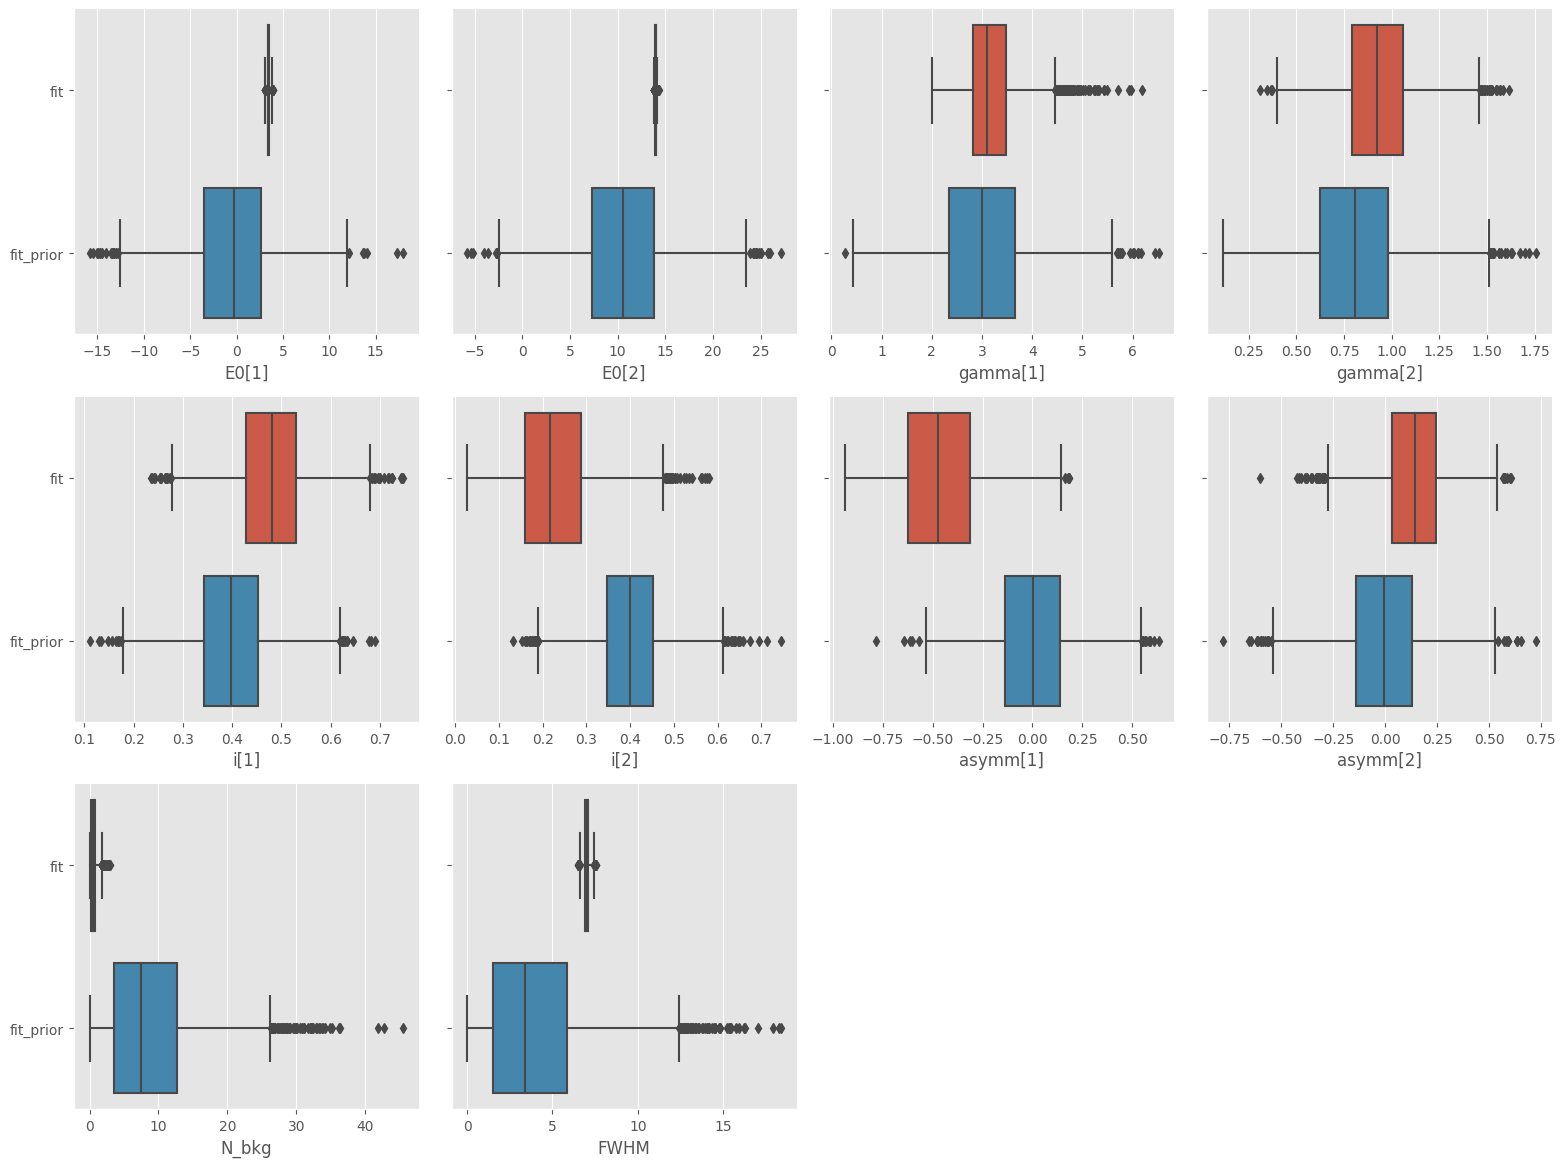

In [54]:
data={"N_bins": len(counts), 
      'N_peaks': 2,
      'counts': counts.tolist(), 
      'x': edges,
      'N_ev': sum(counts), 
      'p_FWHM': 5, 
      'p_gamma': [3,0.8], 
      'p_E0': [5890, 5900],
      'p_i': [0.4,0.4],
      'prior': 1}

sampler_kwargs={
    'chains': 8,
    'iter_warmup': 500,
    'iter_sampling': 500,
    'save_warmup': True, 
}
p = FitPlotter(col_wrap=4)
fit = standard_analysis(model, data, p, sampler_kwargs=sampler_kwargs)

In [55]:
fit.summary().loc['FWHM']

Mean          7.00603
MCSE          0.00279
StdDev        0.15310
5%            6.75168
50%           7.00748
95%           7.25520
N_Eff      3001.57646
N_Eff/s     172.87200
R_hat         1.00037
Name: FWHM, dtype: float64

In [29]:
stan_file= get_stan_file("poisGP.stan")
model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

Found .stan file  /home/pietro/work/TESI/baynes/stan/models/gaussian processes/poisGP.stan



 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



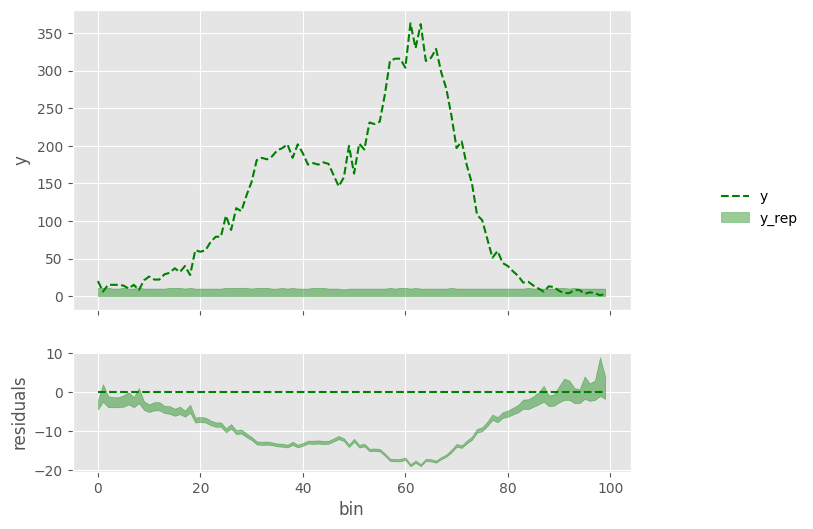


 ---- Prior distribustions ---- 



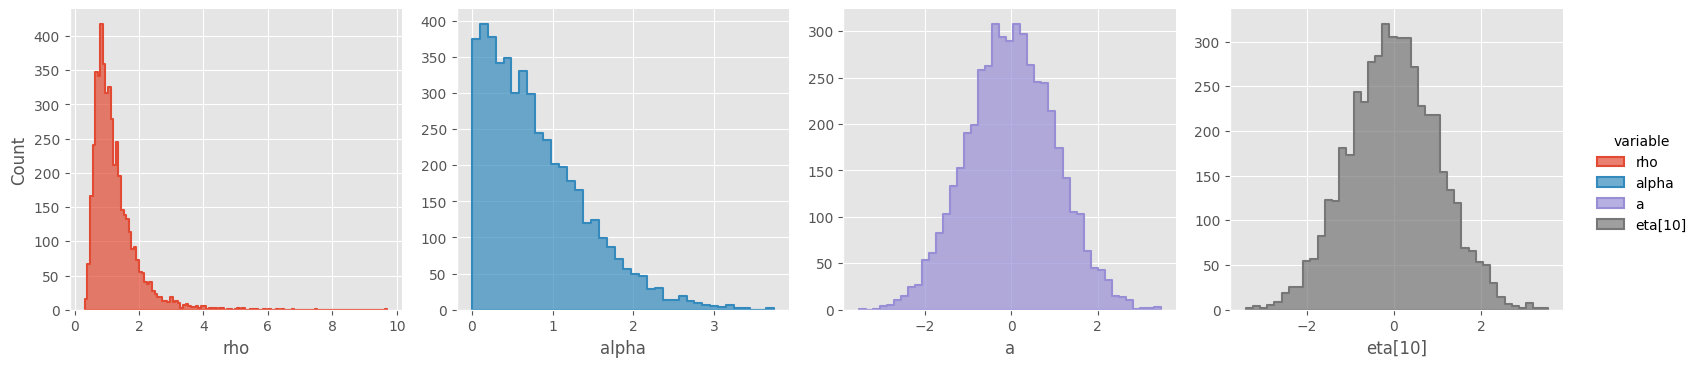


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

chain 11 |          | 00:00 Status

chain 12 |          | 00:00 Status

chain 13 |          | 00:00 Status

chain 14 |          | 00:00 Status

chain 15 |          | 00:00 Status

chain 16 |          | 00:00 Status

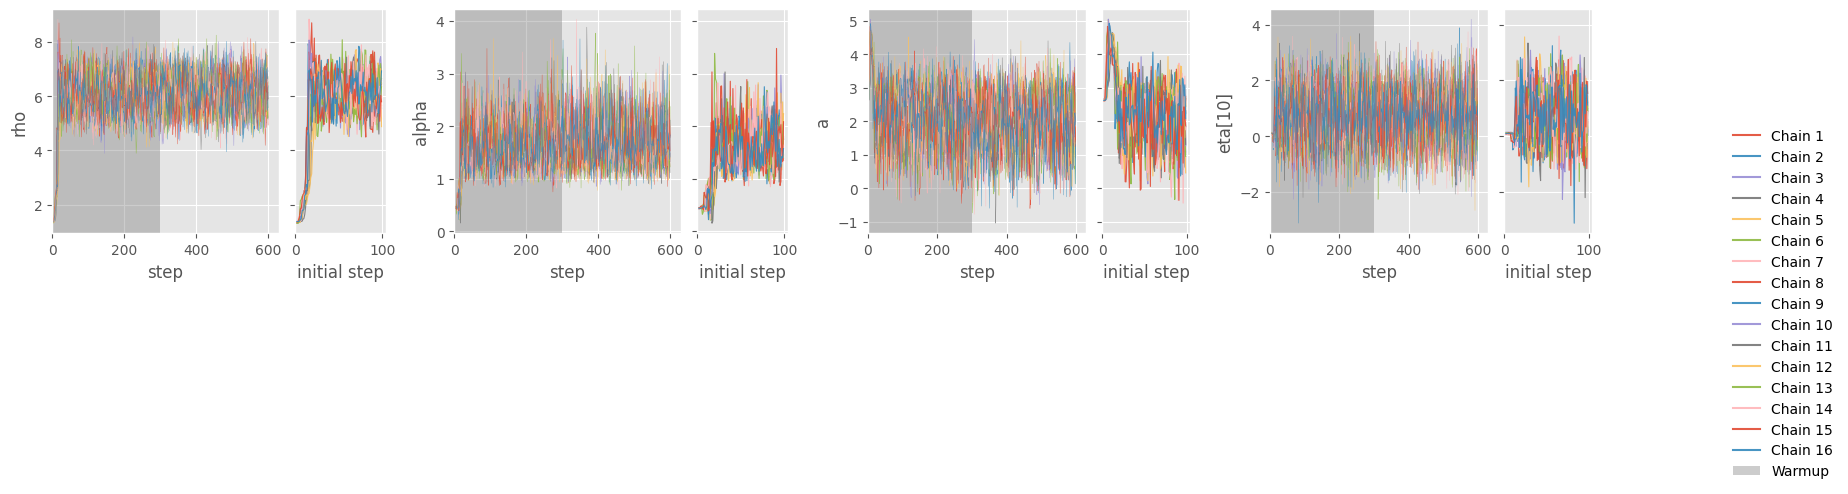


 ---- Prior predictive check ---- 



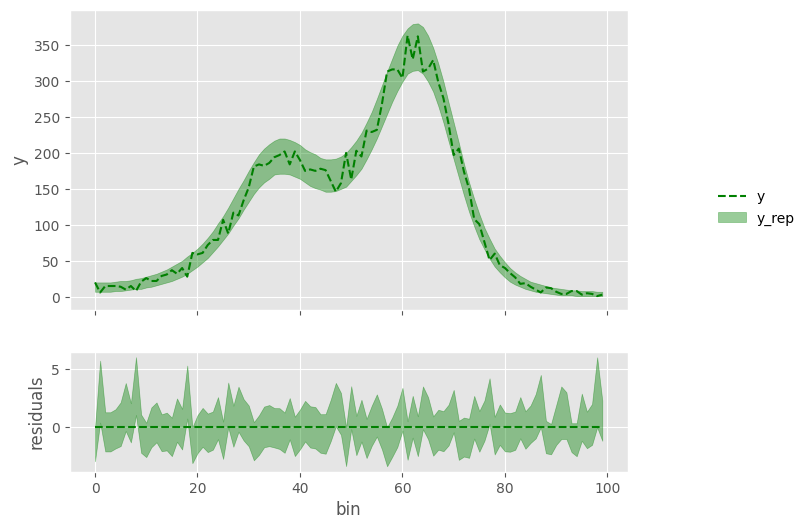


 ---- Posterior distribustions ---- 



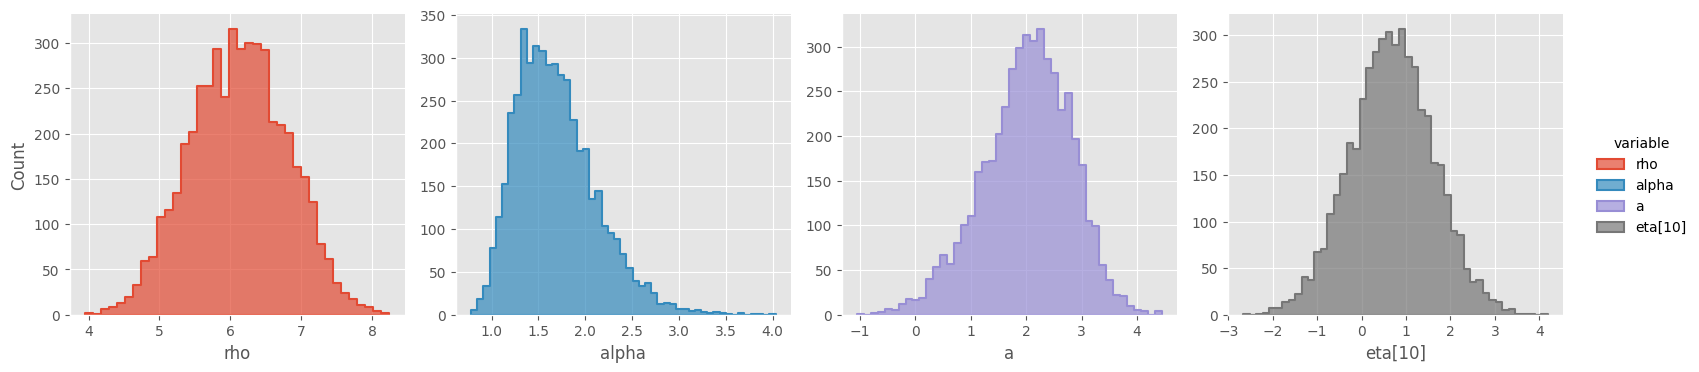


 ---- Prior vs posterior comparison ---- 



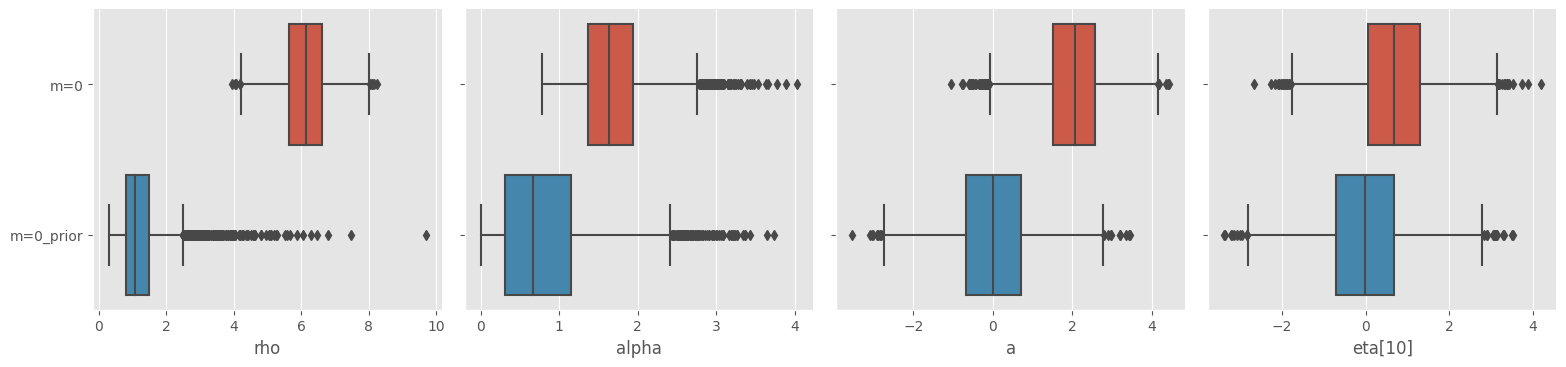

In [30]:
data = {'N': len(counts),
        'x': centers,
        'y': counts}

sampler_kwargs={
    'chains': 16,
    'iter_warmup': 300,
    'iter_sampling': 300,
    'save_warmup': True, 
    'adapt_delta': 0.9,
    'max_treedepth': 12,
}
plot_pars=['rho', 'alpha', 'a', 'eta[10]']
fit = standard_analysis(model, data, p, sampler_kwargs, fit_title='m=0', data_key='y', rep_key='y_rep',plot_params=plot_pars)